In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from src.utils.config_loader import load_config
cfg = load_config("../config.yaml")
data_cfg = cfg['data']

In [ ]:
import math
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

from src.data.visualization import visualize_comparison
from src.data.dataset_loader import DetectionDataset
from src.data.transforms import get_train_transforms, get_val_transforms

In [4]:
train_path = os.path.join("..",data_cfg['processed_dir'], data_cfg['train_parquet'])
val_path = os.path.join("..",data_cfg['processed_dir'], data_cfg['val_parquet'])
train_images = "../" + data_cfg['train_images']
val_images = "../" + data_cfg['val_images']
val_images

'.././dataset/raw/images/val'

In [5]:
train_dataset = DetectionDataset(train_path, train_images, get_train_transforms())
val_dataset = DetectionDataset(val_path, val_images, get_val_transforms())

[INFO] Using 100.00% of the dataset
[INFO] Loaded parquet file - .././dataset/processed/parquet/train
[INFO] Using 100.00% of the dataset
[INFO] Loaded parquet file - .././dataset/processed/parquet/val


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


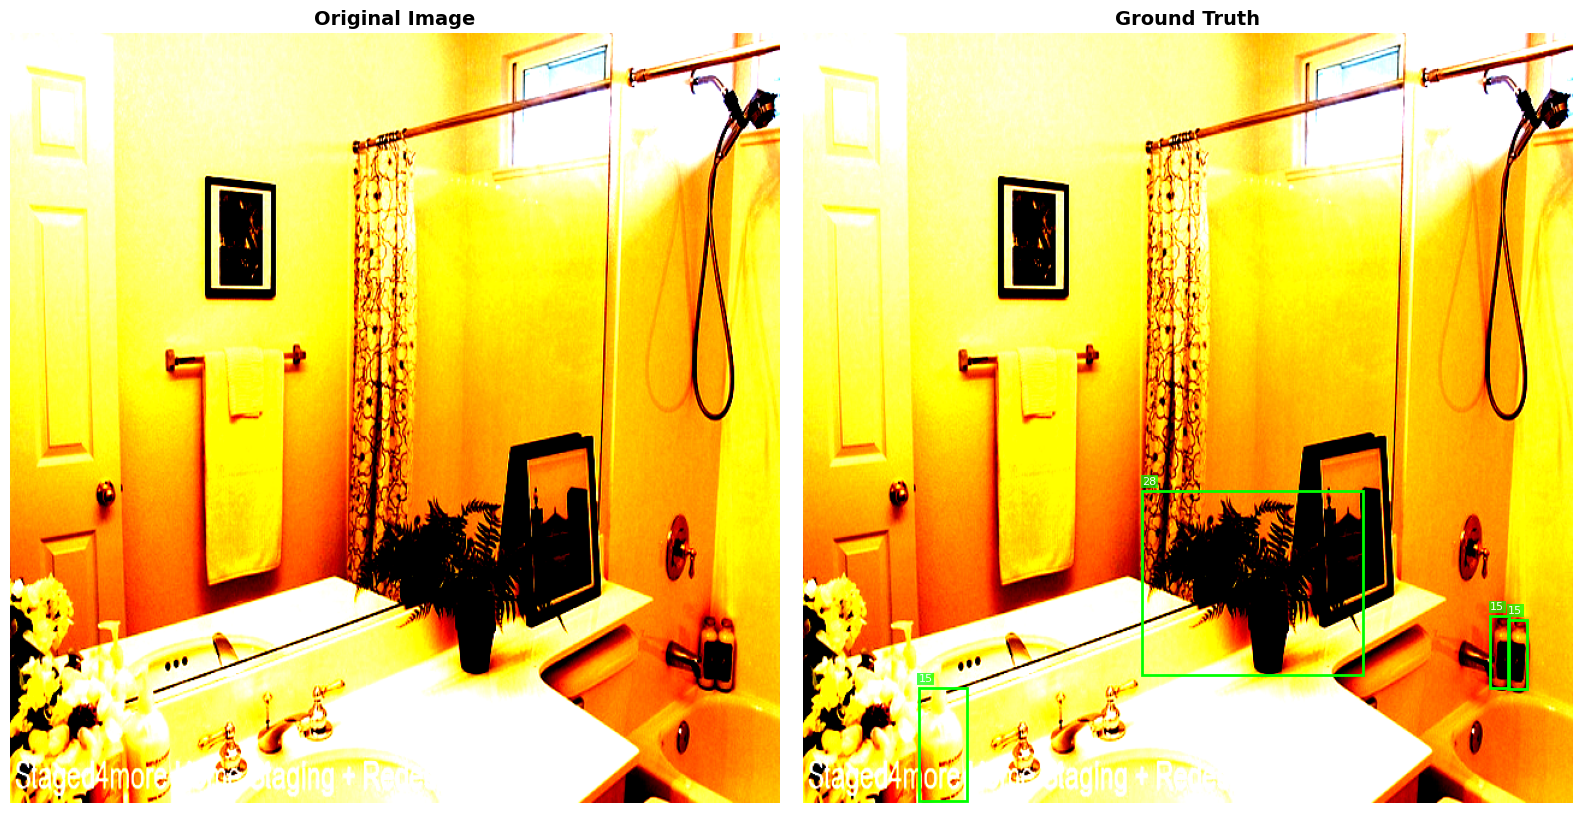

In [6]:
img, bbox = val_dataset.__getitem__(5)
visualize_comparison(image=img, target=bbox)

In [7]:
# Display first few rows of the training dataframe
print("Training Data Sample:")
display(train_dataset.df.head())

# Display basic info about columns and types
print("\nDataFrame Info:")
print(train_dataset.df.info())

Training Data Sample:


,file_name,height,width,id,segmentation,area,iscrowd,bbox,category_id,supercategory,old_category_id,name
1857,000000067180.jpg,640,480,67180,"[[[409.0, 421.0, 408.0, 422.0, 408.0, 423.0, 4...","[5087.0, 663.0, 138174.0, 22602.927650000005, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[[380.0, 421.0, 66.0, 188.0], [176.0, 324.0, 1...","[92, 37, 84, 9, 21, 67, 69, 16]","[solid, textile, wall, outdoor, person, plant,...","[182, 105, 175, 15, 1, 124, 126, 183]","[wood, clothes, wall-stone, bench, person, gra..."
1893,000000059920.jpg,640,427,59920,"[[[424.27, 333.66, 384.0, 316.4, 348.04, 327.9...","[29592.762999999995, 11489.134450000003, 18398...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[[232.99, 316.4, 194.01, 316.41], [0.73, 416.9...","[69, 69, 85, 71, 20, 57, 5, 31, 16]","[furniture, furniture, wall, textile, building...","[70, 70, 176, 168, 96, 117, 132, 102, 183]","[toilet, toilet, wall-tile, towel, building-ot..."
984,000000008532.jpg,426,640,8532,"[[[579.0, 353.0, 578.0, 354.0, 577.0, 354.0, 5...","[22805.0, 2991.748349999999, 129528.0, 97394.3...","[0, 0, 0, 0, 0, 0]","[[0.0, 288.0, 640.0, 138.0], [418.34, 370.48, ...","[55, 67, 20, 21, 81, 16]","[floor, accessory, building, person, wall, other]","[115, 32, 96, 1, 172, 183]","[floor-other, tie, building-other, person, wal..."
61,000000241319.jpg,476,640,241319,"[[[133.06, 69.24, 142.16, 75.31, 142.76, 127.4...","[2473.7309, 1306.0, 39436.45945000002, 64398.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[105.15, 37.6, 38.16, 93.92], [83.0, 0.0, 36....","[15, 25, 45, 85, 70, 70, 70, 71, 70, 42, 42, 4...","[kitchen, raw-material, appliance, wall, indoo...","[44, 143, 81, 176, 90, 90, 90, 31, 90, 47, 47,...","[bottle, plastic, sink, wall-tile, toothbrush,..."
1778,000000561366.jpg,480,640,561366,"[[[381.0, 148.0, 380.0, 149.0, 375.0, 149.0, 3...","[95146.0, 20218.072500000002, 4092.0, 135456.0...","[0, 0, 0, 0, 0, 0, 0]","[[34.0, 0.0, 541.0, 416.0], [352.6, 89.56, 248...","[25, 33, 27, 62, 18, 76, 16]","[raw-material, electronic, raw-material, furni...","[143, 77, 100, 165, 139, 76, 183]","[plastic, cell phone, cardboard, table, paper,..."



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3962 entries, 1857 to 2883
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        3962 non-null   object
 1   height           3962 non-null   int64 
 2   width            3962 non-null   int64 
 3   id               3962 non-null   int64 
 4   segmentation     3962 non-null   object
 5   area             3962 non-null   object
 6   iscrowd          3962 non-null   object
 7   bbox             3962 non-null   object
 8   category_id      3962 non-null   object
 9   supercategory    3962 non-null   object
 10  old_category_id  3962 non-null   object
 11  name             3962 non-null   object
dtypes: int64(3), object(9)
memory usage: 402.4+ KB
None


In [8]:
# 1. Display raw sample to confirm structure
print("Original Data Sample (Image Level):")
display(train_dataset.df.head())

# 2. Flatten the dataframe for Object-Level Analysis
# We explode the list columns so each row represents one object instance.
# Note: We only explode columns relevant for analysis to save memory/time.
# Adjust column names if they differ slightly (e.g. 'category_id' vs 'label').
df_exploded = train_dataset.df.explode(['bbox', 'category_id', 'area', 'name', 'supercategory'])

# Reset index for cleaner look
df_exploded = df_exploded.reset_index(drop=True)

print("\nFlattened Data Sample (Object Level):")
display(df_exploded[['file_name', 'bbox', 'category_id', 'supercategory', 'name']].head())

# 3. Basic Summary Statistics (Using flattened data)
total_images = train_dataset.df['id'].nunique()  # Count unique image IDs
total_objects = len(df_exploded)
num_classes = df_exploded['category_id'].nunique()

print(f"\n--- Dataset Summary ---")
print(f"Total Images:      {total_images}")
print(f"Total Objects:     {total_objects}")
print(f"Unique Classes:    {num_classes}")
print(f"Avg Objects/Image: {total_objects / total_images:.2f}")

# 4. Verify Data Types
# Ensure bbox is a list/array and categories are integers
print("\nFlattened DataFrame Info:")
print(df_exploded.info())

Original Data Sample (Image Level):


,file_name,height,width,id,segmentation,area,iscrowd,bbox,category_id,supercategory,old_category_id,name
1857,000000067180.jpg,640,480,67180,"[[[409.0, 421.0, 408.0, 422.0, 408.0, 423.0, 4...","[5087.0, 663.0, 138174.0, 22602.927650000005, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[[380.0, 421.0, 66.0, 188.0], [176.0, 324.0, 1...","[92, 37, 84, 9, 21, 67, 69, 16]","[solid, textile, wall, outdoor, person, plant,...","[182, 105, 175, 15, 1, 124, 126, 183]","[wood, clothes, wall-stone, bench, person, gra..."
1893,000000059920.jpg,640,427,59920,"[[[424.27, 333.66, 384.0, 316.4, 348.04, 327.9...","[29592.762999999995, 11489.134450000003, 18398...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[[232.99, 316.4, 194.01, 316.41], [0.73, 416.9...","[69, 69, 85, 71, 20, 57, 5, 31, 16]","[furniture, furniture, wall, textile, building...","[70, 70, 176, 168, 96, 117, 132, 102, 183]","[toilet, toilet, wall-tile, towel, building-ot..."
984,000000008532.jpg,426,640,8532,"[[[579.0, 353.0, 578.0, 354.0, 577.0, 354.0, 5...","[22805.0, 2991.748349999999, 129528.0, 97394.3...","[0, 0, 0, 0, 0, 0]","[[0.0, 288.0, 640.0, 138.0], [418.34, 370.48, ...","[55, 67, 20, 21, 81, 16]","[floor, accessory, building, person, wall, other]","[115, 32, 96, 1, 172, 183]","[floor-other, tie, building-other, person, wal..."
61,000000241319.jpg,476,640,241319,"[[[133.06, 69.24, 142.16, 75.31, 142.76, 127.4...","[2473.7309, 1306.0, 39436.45945000002, 64398.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[105.15, 37.6, 38.16, 93.92], [83.0, 0.0, 36....","[15, 25, 45, 85, 70, 70, 70, 71, 70, 42, 42, 4...","[kitchen, raw-material, appliance, wall, indoo...","[44, 143, 81, 176, 90, 90, 90, 31, 90, 47, 47,...","[bottle, plastic, sink, wall-tile, toothbrush,..."
1778,000000561366.jpg,480,640,561366,"[[[381.0, 148.0, 380.0, 149.0, 375.0, 149.0, 3...","[95146.0, 20218.072500000002, 4092.0, 135456.0...","[0, 0, 0, 0, 0, 0, 0]","[[34.0, 0.0, 541.0, 416.0], [352.6, 89.56, 248...","[25, 33, 27, 62, 18, 76, 16]","[raw-material, electronic, raw-material, furni...","[143, 77, 100, 165, 139, 76, 183]","[plastic, cell phone, cardboard, table, paper,..."



Flattened Data Sample (Object Level):


,file_name,bbox,category_id,supercategory,name
0,000000067180.jpg,"[380.0, 421.0, 66.0, 188.0]",92,solid,wood
1,000000067180.jpg,"[176.0, 324.0, 145.0, 110.0]",37,textile,clothes
2,000000067180.jpg,"[0.0, 0.0, 480.0, 470.0]",84,wall,wall-stone
3,000000067180.jpg,"[50.34, 307.78, 429.66, 225.79]",9,outdoor,bench
4,000000067180.jpg,"[102.11, 39.83, 251.69, 484.67]",21,person,person



--- Dataset Summary ---
Total Images:      3962
Total Objects:     54684
Unique Classes:    94
Avg Objects/Image: 13.80

Flattened DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54684 entries, 0 to 54683
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file_name        54684 non-null  object
 1   height           54684 non-null  int64 
 2   width            54684 non-null  int64 
 3   id               54684 non-null  int64 
 4   segmentation     54684 non-null  object
 5   area             54684 non-null  object
 6   iscrowd          54684 non-null  object
 7   bbox             54684 non-null  object
 8   category_id      54684 non-null  object
 9   supercategory    54684 non-null  object
 10  old_category_id  54684 non-null  object
 11  name             54684 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.0+ MB
None


Dropdown(description='Supercategory:', options=('accessory', 'animal', 'appliance', 'building', 'ceiling', 'el…

/tmp/ipykernel_200605/433755027.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


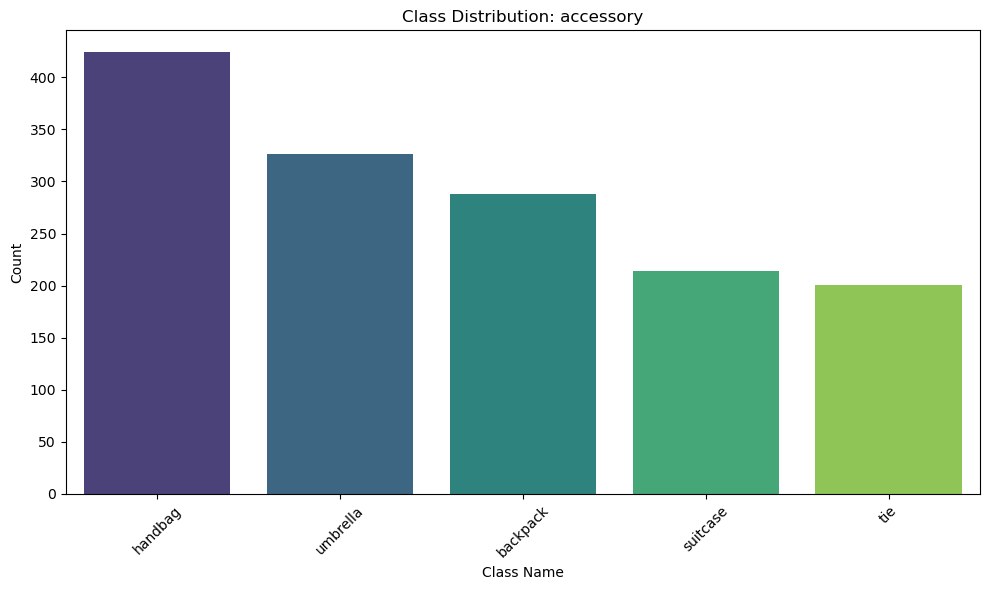

In [ ]:
# 1. Get Unique Supercategories
supercategories = sorted(df_exploded['supercategory'].unique())

# 2. Create Dropdown Widget
dropdown = widgets.Dropdown(
    options=supercategories,
    value=supercategories[0],
    description='Supercategory:',
    disabled=False,
)

# 3. Define Plotting Function
def plot_class_distribution(change):
    selected_supercat = change['new'] if isinstance(change, dict) else change
    
    # Clear previous output
    clear_output(wait=True)
    display(dropdown) # Re-display dropdown so it stays at top
    
    # Filter data
    subset = df_exploded[df_exploded['supercategory'] == selected_supercat]
    counts = subset['name'].value_counts()
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.title(f"Class Distribution: {selected_supercat}")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Link Widget to Function
dropdown.observe(plot_class_distribution, names='value')

# 5. Initial Display
plot_class_distribution(dropdown.value)

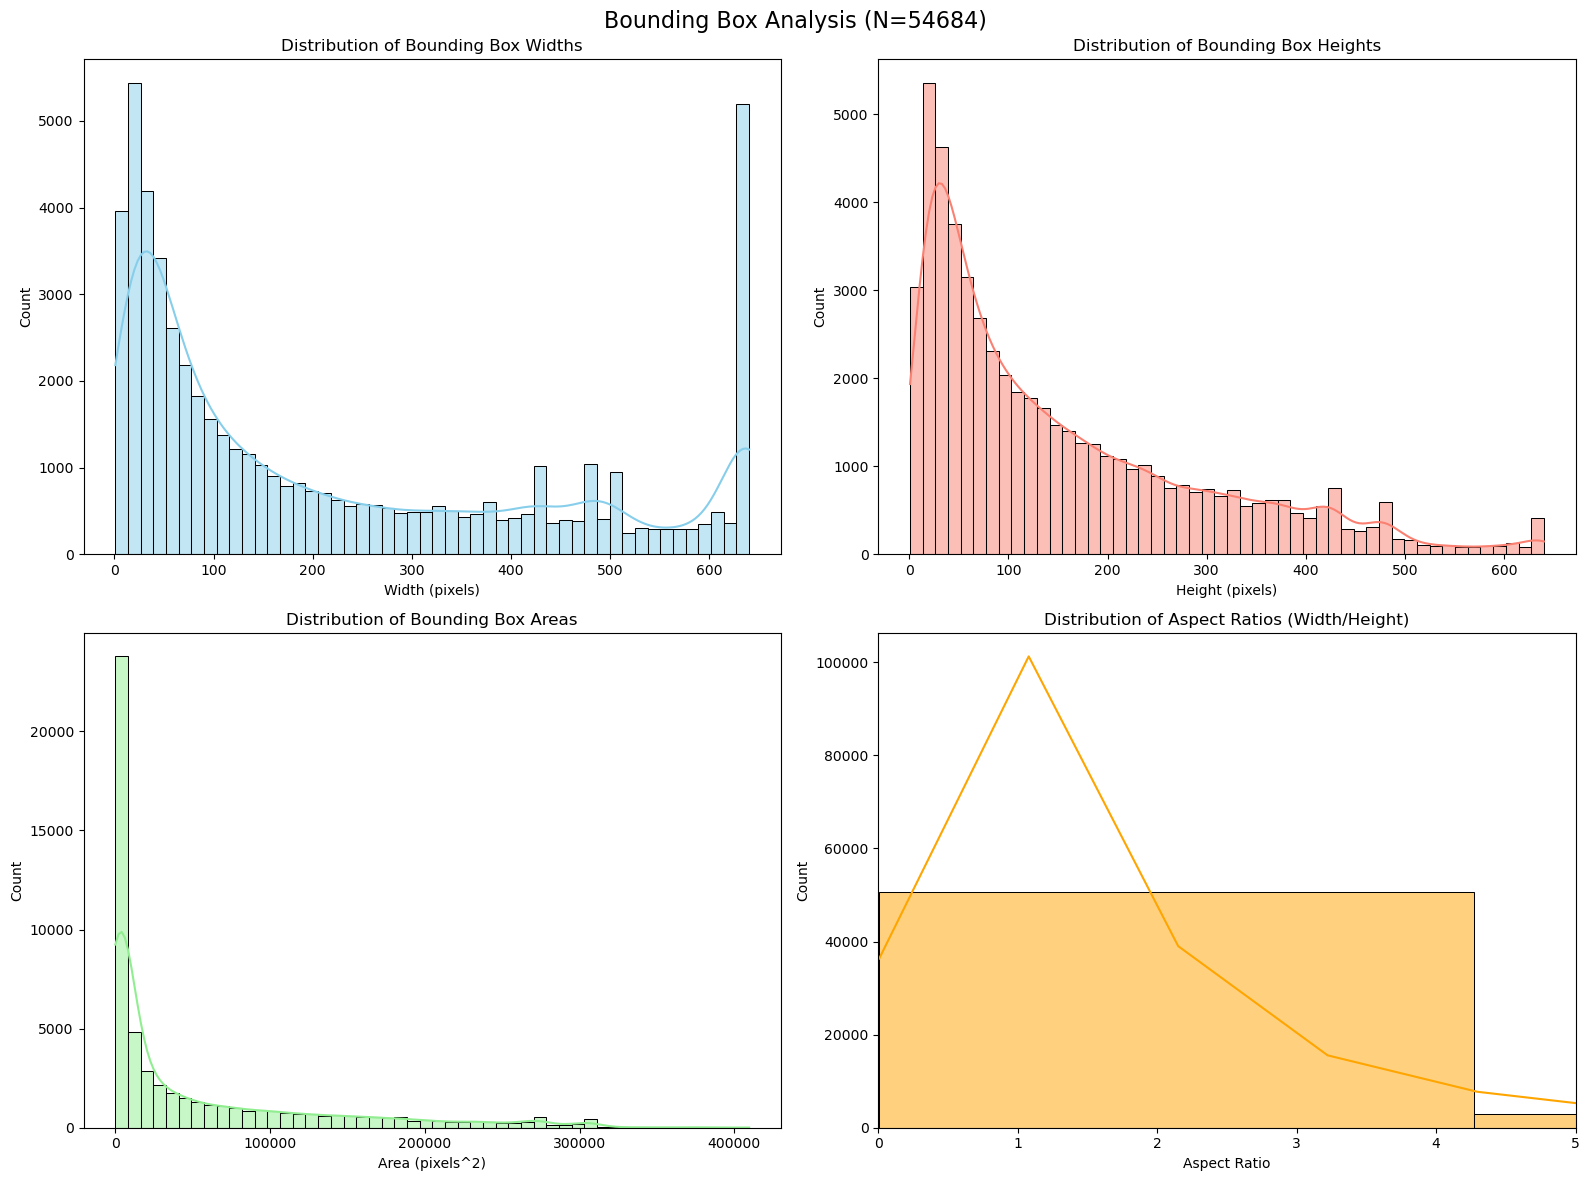

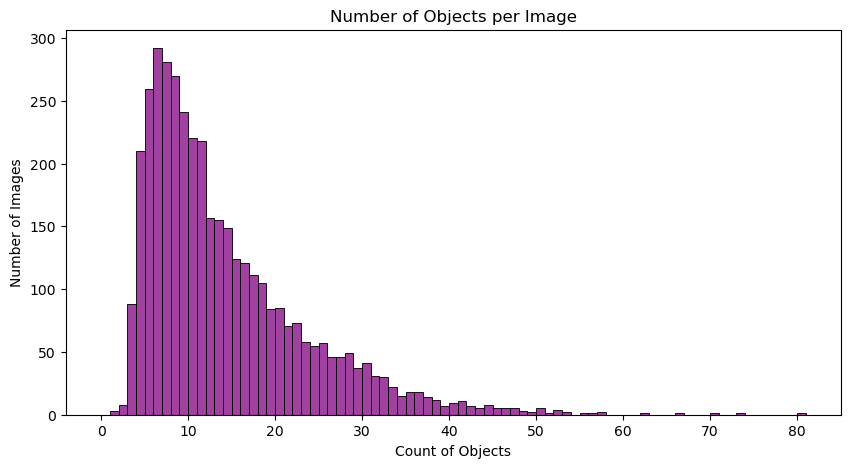

In [10]:
# 1. Extract Box Metrics directly from the exploded dataframe
# df_exploded['bbox'] contains lists like [x, y, w, h]

# Convert the 'bbox' column (which contains lists) into a proper 2D numpy array
# or separate columns for easier plotting.
bbox_array = np.array(df_exploded['bbox'].tolist())

# Create a specific DataFrame for box stats to keep things clean
df_boxes = pd.DataFrame(bbox_array, columns=['x', 'y', 'width', 'height'])

# Add derived metrics
df_boxes['area'] = df_boxes['width'] * df_boxes['height']
# Handle potential division by zero if height is 0 (unlikely but possible in bad data)
df_boxes['aspect_ratio'] = df_boxes['width'] / (df_boxes['height'] + 1e-6) 
df_boxes['supercategory'] = df_exploded['supercategory'] # Bring in supercategory for potential filtering

# 2. Plot Box Dimensions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Width Distribution
sns.histplot(df_boxes['width'], bins=50, ax=axes[0, 0], color='skyblue', kde=True)
axes[0, 0].set_title('Distribution of Bounding Box Widths')
axes[0, 0].set_xlabel('Width (pixels)')

# Height Distribution
sns.histplot(df_boxes['height'], bins=50, ax=axes[0, 1], color='salmon', kde=True)
axes[0, 1].set_title('Distribution of Bounding Box Heights')
axes[0, 1].set_xlabel('Height (pixels)')

# Area Distribution (Log Scale usually helps visualization)
sns.histplot(df_boxes['area'], bins=50, ax=axes[1, 0], color='lightgreen', kde=True)
axes[1, 0].set_title('Distribution of Bounding Box Areas')
axes[1, 0].set_xlabel('Area (pixels^2)')

# Aspect Ratio Distribution
sns.histplot(df_boxes['aspect_ratio'], bins=50, ax=axes[1, 1], color='orange', kde=True)
axes[1, 1].set_title('Distribution of Aspect Ratios (Width/Height)')
axes[1, 1].set_xlabel('Aspect Ratio')
axes[1, 1].set_xlim(0, 5) # Focus on the most common ratios

plt.suptitle(f"Bounding Box Analysis (N={len(df_boxes)})", fontsize=16)
plt.tight_layout()
plt.show()

# 3. Objects per Image (using the original un-exploded dataframe for correct counts)
# We count the number of items in the 'bbox' list for each image row
objects_per_img = train_dataset.df['bbox'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(objects_per_img, bins=range(0, objects_per_img.max() + 2), kde=False, color='purple')
plt.title('Number of Objects per Image')
plt.xlabel('Count of Objects')
plt.ylabel('Number of Images')
plt.show()

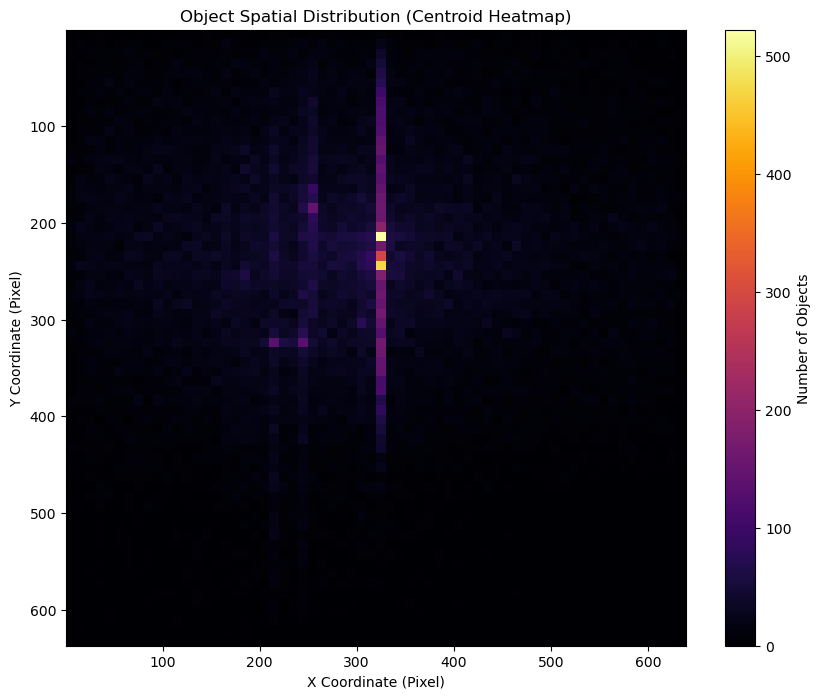

In [11]:
# 1. Calculate Centroids
center_x = df_boxes['x'] + df_boxes['width'] / 2
center_y = df_boxes['y'] + df_boxes['height'] / 2

# 2. Plot 2D Histogram (Heatmap)
plt.figure(figsize=(10, 8))
plt.hist2d(center_x, center_y, bins=[64, 64], cmap='inferno')

# Add labels and title
plt.colorbar(label='Number of Objects')
plt.title('Object Spatial Distribution (Centroid Heatmap)')
plt.xlabel('X Coordinate (Pixel)')
plt.ylabel('Y Coordinate (Pixel)')

# Invert Y axis because image coordinates start from top-left (0,0)
plt.gca().invert_yaxis()

plt.show()

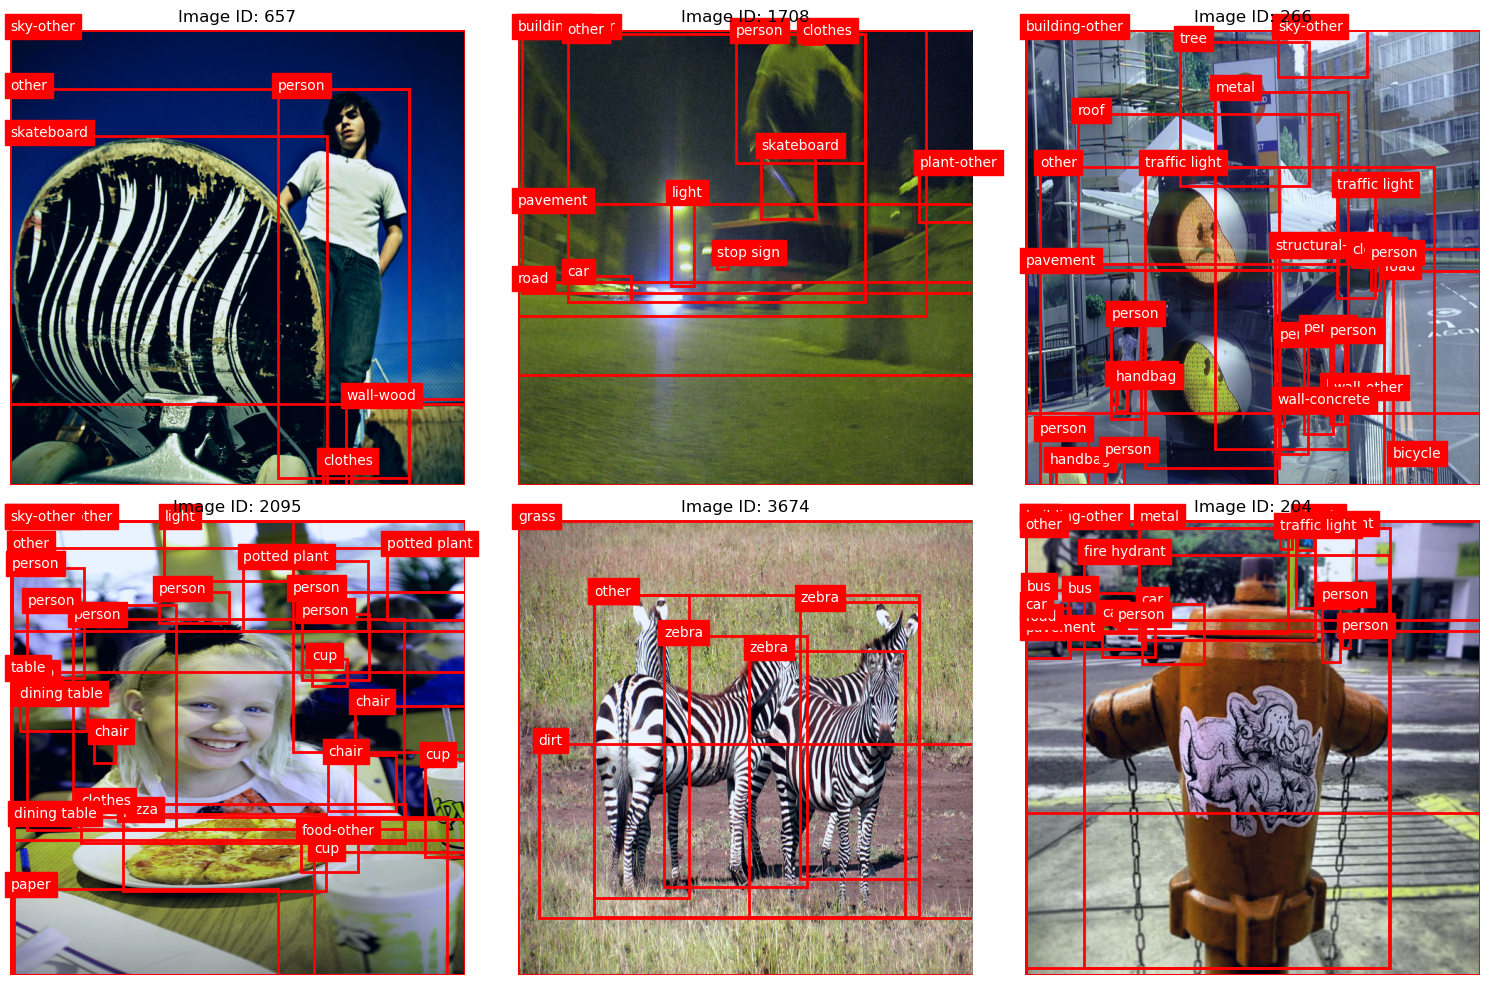

In [12]:
# 1. Helper Function to Denormalize Images
def denormalize(tensor):
    img = tensor.clone().detach().cpu()
    img = img - img.min()
    img = img / img.max()
    return img.permute(1, 2, 0).numpy()

# 2. Visualization Grid
num_samples = 6
cols = 3
rows = math.ceil(num_samples / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

indices = random.sample(range(len(train_dataset)), num_samples)

for i, idx in enumerate(indices):
    # Get image and target from dataset
    img_tensor, target = train_dataset[idx]
    img_np = denormalize(img_tensor)
    
    axes[i].imshow(img_np)
    
    # Plot Bounding Boxes (XYWH format)
    # Target likely contains 'boxes' and 'labels'
    if isinstance(target, dict) and 'boxes' in target:
        boxes = target['boxes'].cpu().numpy() # Shape: [N, 4] (x, y, w, h)
        labels = target['name']
        
        for box, label in zip(boxes, labels):
            x, y, w, h, _ = box # Unpack directly as x, y, w, h
            
            # Draw Box
            rect = plt.Rectangle((x, y), w, h, 
                                 fill=False, color='red', linewidth=2)
            axes[i].add_patch(rect)
            
            # Add Label Text
            axes[i].text(x, y, f"{label}", 
                         color='white', fontsize=10, backgroundcolor='red')
            
    axes[i].set_title(f"Image ID: {idx}")
    axes[i].axis('off')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 1. Prepare Data
df_corr = df_exploded[['name', 'supercategory']].copy()

# Extract width and height again from bbox list [x, y, w, h]
bboxes = df_exploded['bbox'].tolist()
df_corr['width'] = [b[2] for b in bboxes]
df_corr['height'] = [b[3] for b in bboxes]
df_corr['area'] = df_corr['width'] * df_corr['height']

# 2. Interactive Plot with Dropdown
unique_supercats = sorted(df_corr['supercategory'].unique())

def plot_distribution(supercat):
    # Filter data for the selected supercategory
    subset = df_corr[df_corr['supercategory'] == supercat]
    
    # Sort classes by median area for better readability
    if not subset.empty:
        order = subset.groupby('name')['area'].median().sort_values().index
    else:
        order = None
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=subset, x='name', y='area', order=order, palette="coolwarm")
    
    plt.title(f"Box Area Distribution - {supercat}")
    plt.xlabel("Class Name")
    plt.ylabel("Box Area (pixels^2)")
    plt.xticks(rotation=45)
    
    # Optional: Log scale if variance is huge
    # plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

# Create the interactive widget
interact(plot_distribution, 
         supercat=widgets.Dropdown(
             options=unique_supercats,
             value=unique_supercats[0] if unique_supercats else None,
             description='Supercat:',
             disabled=False
         ))

interactive(children=(Dropdown(description='Supercat:', options=('accessory', 'animal', 'appliance', 'building…

<function __main__.plot_distribution(supercat)>